# Below we will import various libraries that are needed for data preprocessing.

In [2]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

## Dataset : https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

# Let us see how the librosa library loads the audio file and see the sample rate.

In [6]:
y, sr = librosa.load('wavfiles/blues.00005.wav')

In [7]:
y.shape

(661794,)

# Sampling rate

In [8]:
sr

22050

## Ref: https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

# Plotting the wave(signal) using matplot

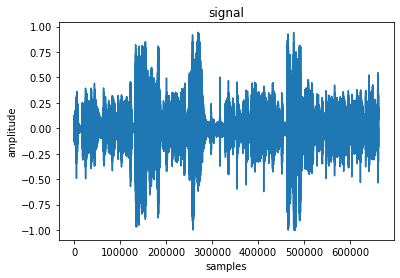

In [9]:
# Plotting the wave
plt.plot(y);
plt.title('signal');
plt.xlabel('samples');
plt.ylabel('amplitude');

# Fourier Transform

In [10]:
fourier_transform = np.abs(librosa.stft(y[:2048], hop_length = 2048+1))

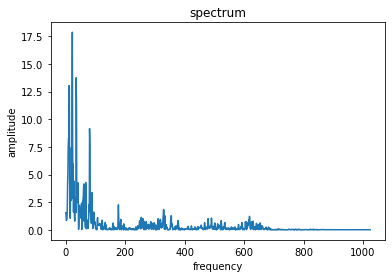

In [11]:
plt.plot(fourier_transform);
plt.title('spectrum');
plt.xlabel('frequency');
plt.ylabel('amplitude');

# Plotting the spectrogram

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


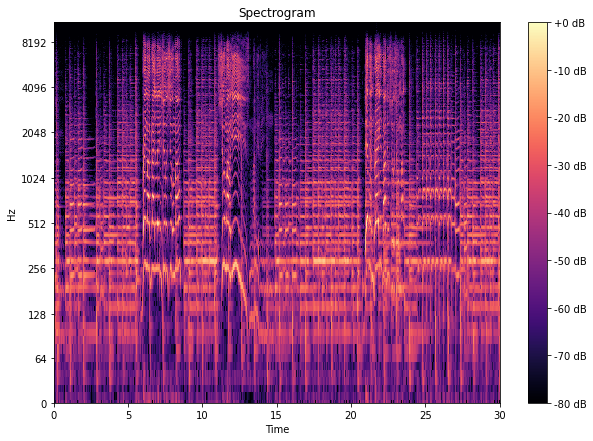

In [14]:
spectrogram = np.abs(librosa.stft(y, hop_length=512))
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7));
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

# Melspectrogram

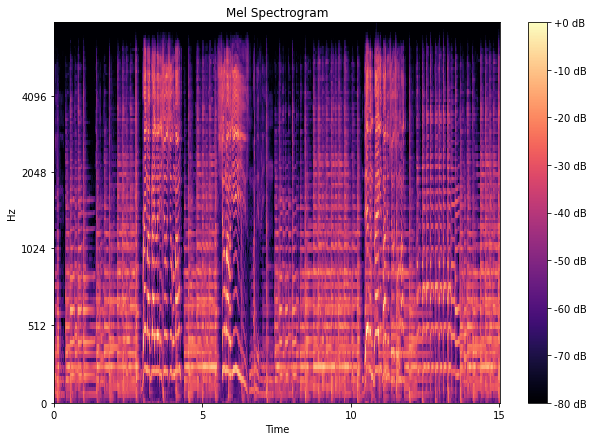

In [20]:
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(10,7))
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

# MFFC 

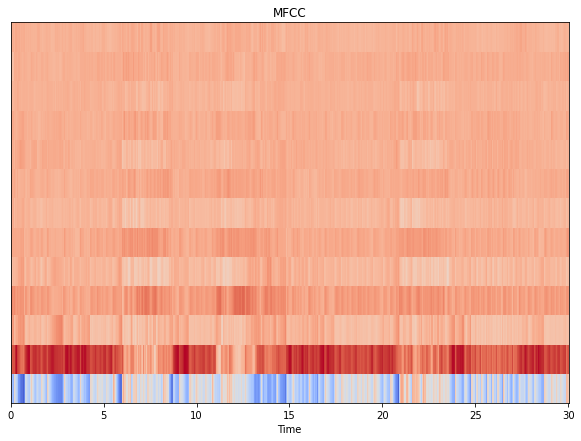

In [21]:
mfccData = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
plt.figure(figsize=(10,7));
librosa.display.specshow(mfccData, x_axis='time');
plt.title('MFCC');

# Below we will extract the sepctrogram data from the audio files in the parent folder. And save them into a dataframe and X and y.

In [40]:
def melspectrogram(folder):
    genre_labels = []
    melspectrograms = []
    m = []
    gl = []
    for f in os.scandir(folder):
        y, sr = librosa.core.load(f)
        label = str(f).split('.')[0][11:]
        genre_labels.append(label)
        gl.append(label)
        spectrograms = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spectrograms = librosa.power_to_db(spectrograms, ref=np.max)
        if spectrograms.shape[1] != 660:
            spectrograms.resize(128,660, refcheck=False)
        melspectrograms.append(spectrograms)
        s = spectrograms.flatten()
        m.append(s)
        
    m = np.array(m)
    gl = np.array(gl).reshape(1000,1)
    data = np.hstack((m,gl))
    data = pd.DataFrame(data)
    genre_labels = pd.Series(genre_labels)
    genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}
    X = np.array(melspectrograms)
    y = genre_labels.map(genreLabels)
    
    return X, y,data

In [41]:
X, y, data = melspectrogram('wavfiles')

In [42]:
data.to_csv('spectrogramdata.csv', index=False)

# Data Cleaning

## Lets read the data and do the necessary changes

In [45]:
print(data)

                   0                    1                    2      \
0     -24.18558041384419   -27.34023495381583  -27.214727318908622   
1     -34.48286383656161  -29.062456906408862   -34.23983863467555   
2     -31.57187804458663   -38.35720888839468   -37.50267243303714   
3    -38.706380136705235   -58.00810843738472  -51.764936540899875   
4    -13.395083593107017  -22.886149344390397   -39.37169392676062   
..                   ...                  ...                  ...   
995   -16.20572285710837   -21.00907902589681   -18.17006779924013   
996  -24.913771948395105   -40.67562127579205    -37.8667258061649   
997  -14.968432646002235   -28.16246690681576   -39.11210521102985   
998   -25.35339970508101  -25.066291009450136  -33.941620599118366   
999  -22.240641438764037   -44.78728457903918  -40.376213843741446   

                   3                    4                    5      \
0    -23.694856150844302  -10.349419494551416   -11.81776571754284   
1     -41.848854340

In [54]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,84471,84472,84473,84474,84475,84476,84477,84478,84479,84480
0,-24.18558041384419,-27.34023495381583,-27.214727318908622,-23.694856150844302,-10.349419494551416,-11.81776571754284,-19.678226027144415,-26.396505817035624,-25.827951736902854,-30.779961648407347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,reggae
1,-34.48286383656161,-29.062456906408862,-34.23983863467555,-41.84885434025094,-38.884556936516546,-46.74093254833946,-41.78007651011741,-42.44926245740069,-37.31029242051457,-38.98990745017433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jazz
2,-31.57187804458663,-38.35720888839468,-37.50267243303714,-32.508841941417835,-22.891088264941786,-28.224278901993056,-33.885255491952464,-35.00026529591685,-35.61457511944254,-36.32557657878782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disco
3,-38.706380136705235,-58.00810843738472,-51.764936540899875,-48.83175666176444,-54.74565330783134,-56.27259110120167,-52.029981875160814,-54.15285800686816,-57.49269272853151,-55.9626509520931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jazz
4,-13.395083593107017,-22.886149344390397,-39.37169392676062,-39.8735162434379,-44.11192771001422,-41.43082983836868,-35.43277369353146,-43.90700633841488,-44.25970970392867,-45.559255394046204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disco


In [55]:
data.iloc[:,-1:]

,84480
0,reggae
1,jazz
2,disco
3,jazz
4,disco
...,...
995,disco
996,jazz
997,disco
998,jazz


### Lets rename the above column and map them to the values 

In [56]:
genreLabels = {'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9, 'rock': 10}

In [79]:
data.columns = data.columns.astype(str)
data = data.rename(columns={"84480": "labels"})

In [80]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '84471', '84472', '84473', '84474', '84475', '84476', '84477', '84478',
       '84479', 'labels'],
      dtype='object', length=84481)

In [82]:
data['y'] = data['labels'].map(genreLabels)

In [83]:
data

,0,1,2,3,4,5,6,7,8,9,...,84472,84473,84474,84475,84476,84477,84478,84479,labels,y
0,-24.18558041384419,-27.34023495381583,-27.214727318908622,-23.694856150844302,-10.349419494551416,-11.81776571754284,-19.678226027144415,-26.396505817035624,-25.827951736902854,-30.779961648407347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,reggae,9
1,-34.48286383656161,-29.062456906408862,-34.23983863467555,-41.84885434025094,-38.884556936516546,-46.74093254833946,-41.78007651011741,-42.44926245740069,-37.31029242051457,-38.98990745017433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jazz,6
2,-31.57187804458663,-38.35720888839468,-37.50267243303714,-32.508841941417835,-22.891088264941786,-28.224278901993056,-33.885255491952464,-35.00026529591685,-35.61457511944254,-36.32557657878782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disco,4
3,-38.706380136705235,-58.00810843738472,-51.764936540899875,-48.83175666176444,-54.74565330783134,-56.27259110120167,-52.029981875160814,-54.15285800686816,-57.49269272853151,-55.9626509520931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jazz,6
4,-13.395083593107017,-22.886149344390397,-39.37169392676062,-39.8735162434379,-44.11192771001422,-41.43082983836868,-35.43277369353146,-43.90700633841488,-44.25970970392867,-45.559255394046204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disco,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-16.20572285710837,-21.00907902589681,-18.17006779924013,-20.97075831613764,-17.895925466490894,-14.286555547718557,-15.845317893830057,-21.424645014097944,-15.73558370732108,-26.264037517855552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disco,4
996,-24.913771948395105,-40.67562127579205,-37.8667258061649,-26.53675396147542,-37.54043328230501,-47.82761918201293,-41.86156950156523,-34.062652679246895,-41.67483707366463,-46.35201877011723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jazz,6
997,-14.968432646002235,-28.16246690681576,-39.11210521102985,-49.58410878014759,-50.96449204488061,-47.624779936893134,-53.555138418610156,-53.90014836201408,-48.4871586362821,-46.26909740794554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,disco,4
998,-25.35339970508101,-25.066291009450136,-33.941620599118366,-28.501343401084963,-25.769508480483175,-30.965110280453214,-26.60733816833984,-23.986837267548708,-25.150655106179478,-26.404162791858194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jazz,6


# EDA

In [84]:
genres = list(data['labels'].unique())

In [85]:
genres

['reggae',
 'jazz',
 'disco',
 'rock',
 'metal',
 'pop',
 'country',
 'blues',
 'classical',
 'hiphop']

In [97]:
def plotMelSpectrogram(genre):
    y, sr = librosa.core.load(f'../data/wavfiles/{genre}.00000.wav')
    s = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    s = librosa.power_to_db(s, ref=np.max)
    plt.figure(figsize=(12,8))
    librosa.display.specshow(s, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


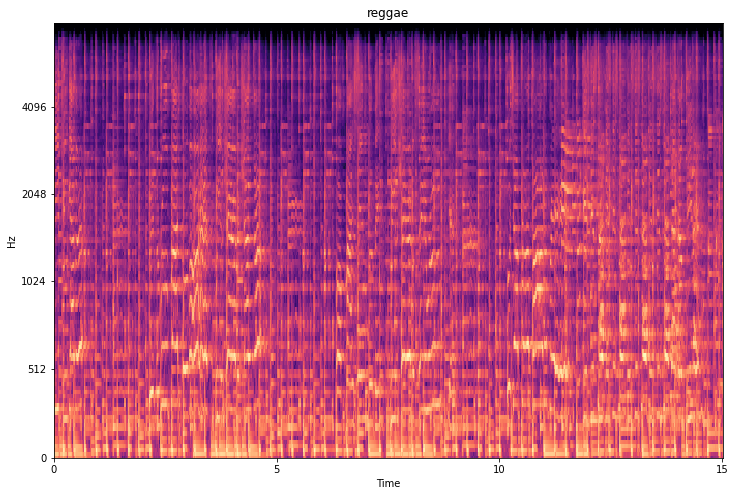

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


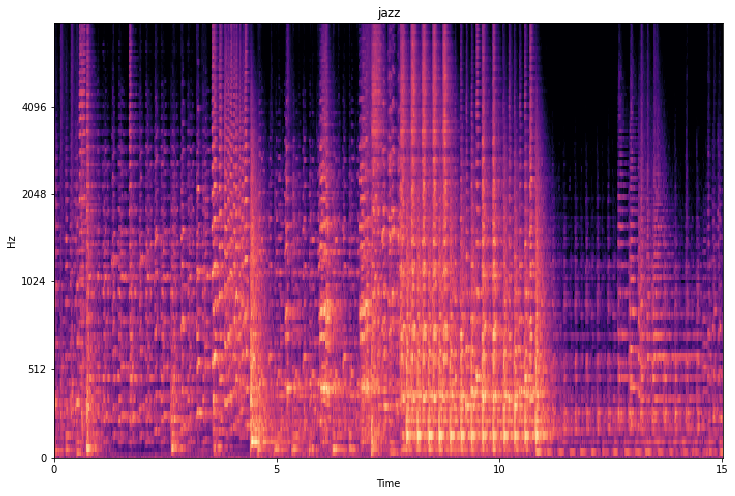

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


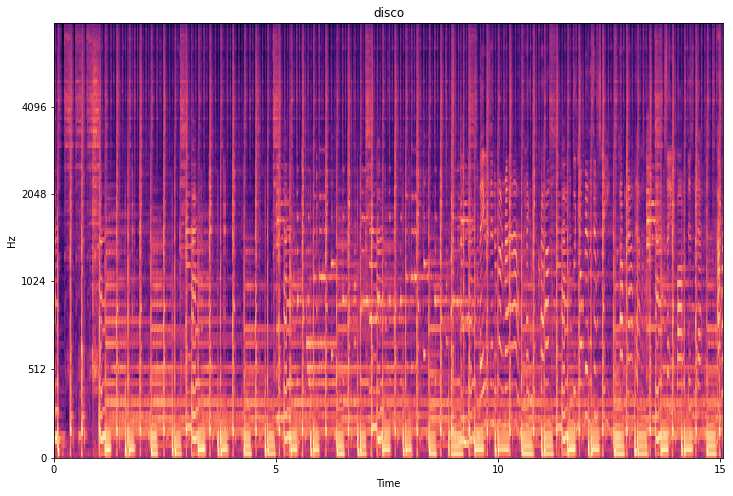

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


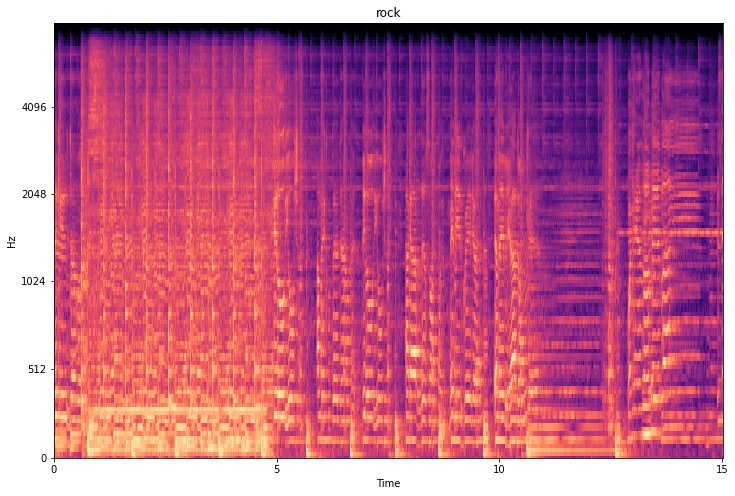

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


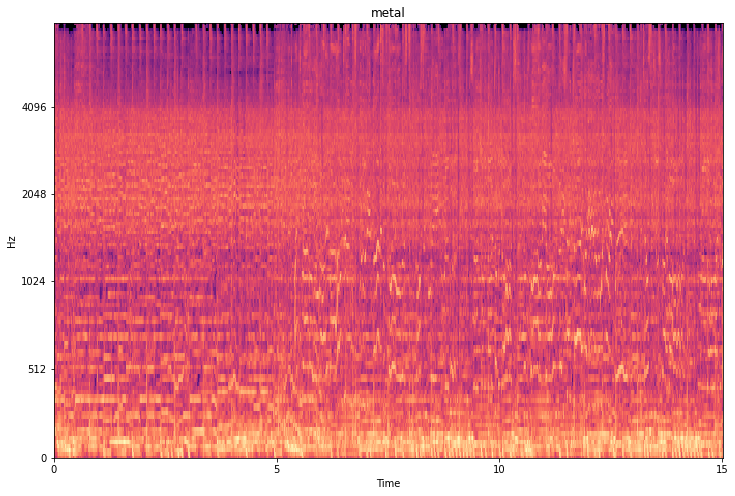

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


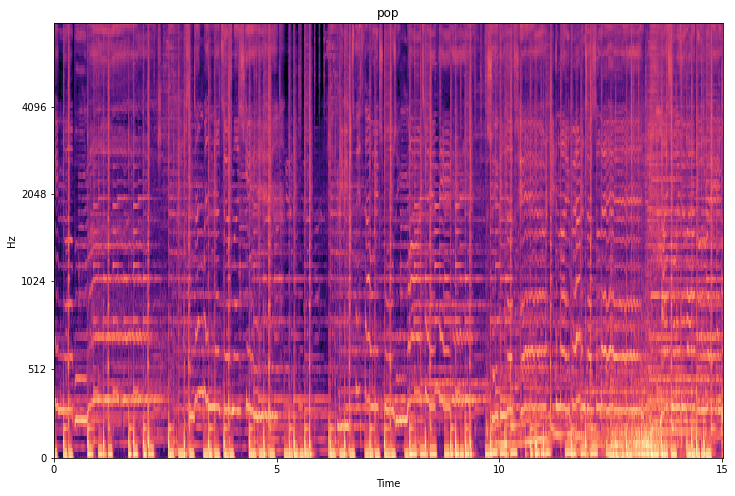

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


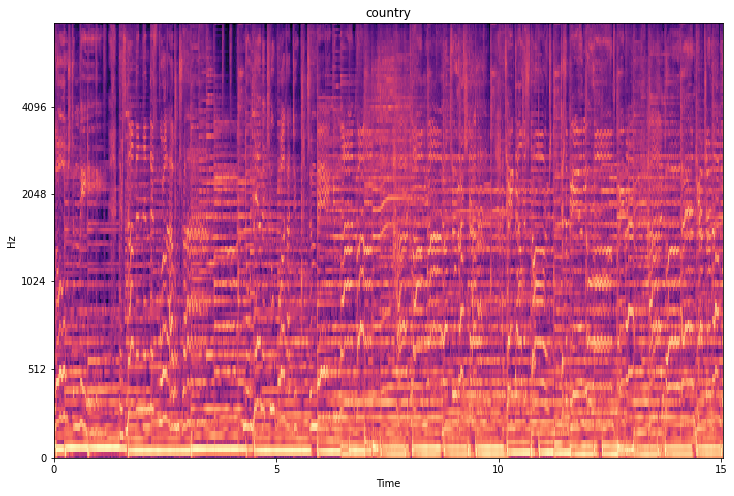

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


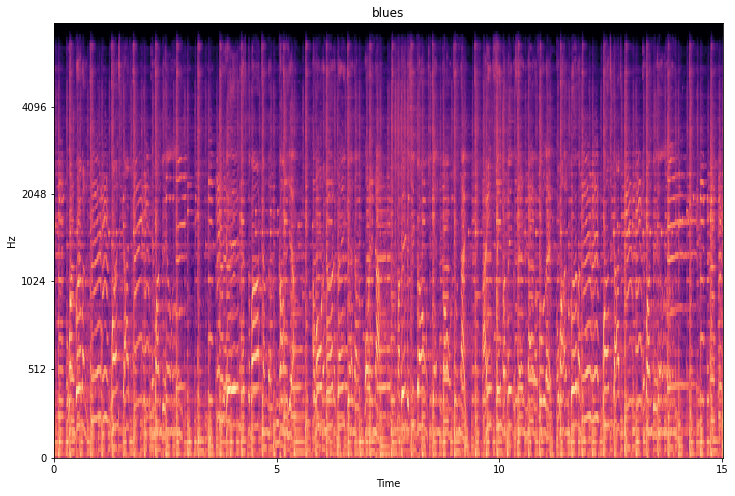

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


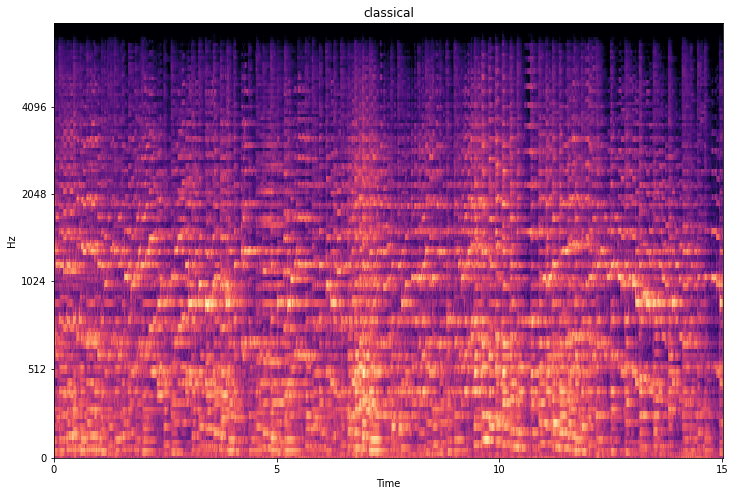

/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/raghuveerareddymalreddy/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:797: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


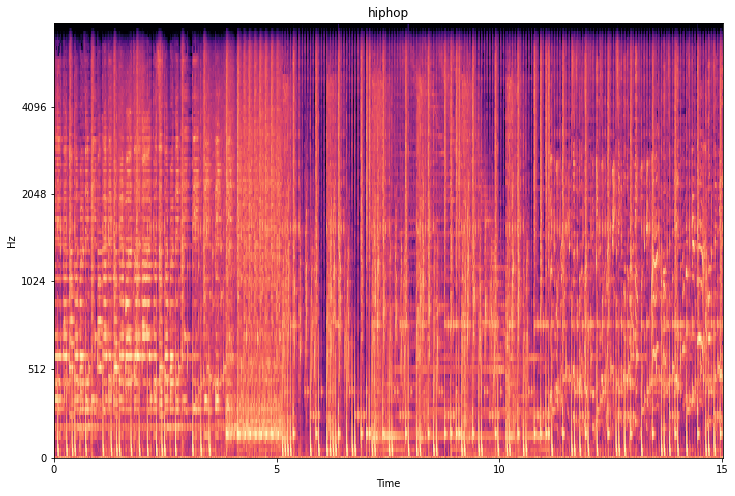

In [98]:
for g in genres:
    plotMelSpectrogram(g)